***
# <font color=green size=10>CURSO DE ESTADÍSTICA - PARTE 2</font>
***

# <font color=green>1 CONOCIENDO LOS DATOS</font>
***

## <font color=green>1.1 Dataset del proyecto</font>
***

### Encuesta Nacional por Muestreo de Hogares - 2015

La **Encuesta Nacional por Muestreo de Hogares - ENMH** en Brasil anualmente investiga, de manera permanente, características generales de la población, educación, trabajo, ingresos, vivienda y otras, con frecuencia variables, de acuerdo a las necesidades de información del país, tales como las características de migración, fecundidad, nupcialidad, salud, seguridad alimentaria, entre otros temas. La recopilación de estas estadísticas constituye, durante los 49 años de realización de la investigación, un importante instrumento para la formulación, validación y evaluación de políticas orientadas al desarrollo socioeconómico y la mejora de las condiciones de vida en Brasil.

### Fuente de los Datos

Instituto Brasileño de Geografía y Estadística (IBGE) Encuesta Nacional por Muestreo de Hogares(PNAD) en el 2015

### Variables utilizadas

> ### Ingresos
> ***

Ingresos mensuales del trabajo principal para personas de 10 años o más.

> ### Edad
> ***

Edad del residente en años en la fecha de referencia .

> ### Altura (elaboración propia)
> ***

Altura del habitante en metros.

> ### UF
> ***

Unidad Federal

|Código|Descripción|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descripción|
|---|---|
|0|Masculino|
|1|Femenino|

> ### Años de Estudio
> ***

|Código|Descripción|
|---|---|
|1|Sin educación o menos de 1 año|
|2|1 año|
|3|2 años|
|4|3 años|
|5|4 años|
|6|5 años|
|7|6 años|
|8|7 años|
|9|8 años|
|10|9 años|
|11|10 años|
|12|11 años|
|13|12 años|
|14|13 años|
|15|14 años|
|16|15 años o más|
|17|No determinado|
||No aplica|

> ### Color
> ***

|Código|Descripción|
|---|---|
|0|Indígena|
|2|Blanco|
|4|Negro|
|6|Amarillo|
|8|Pardo|
|9|Sin declarar|

#### <font color='red'>Nota</font>
***
> Se realizaron los siguientes tratamientos sobre los datos originales:
> 1. Se eliminaron los registros en los que **Ingreso** no era válido. (999 999 999 999);
> 2. Se eliminaron los registros en los que **Ingreso** eran missing;
> 3. Solo se consideraron los registros de **Personas de Referencia** de cada hogar (responsable del hogar).

### Importando pandas y leyendo el dataset del proyecto

https://pandas.pydata.org/

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import poisson, norm

In [4]:
datos = pd.read_csv("/content/datos.csv", encoding='latin1')

In [5]:
datos.head()

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [6]:
datos.sample(10)

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
41156,33,0,30,8,7,1000,1.767826
46719,35,0,68,6,16,1000,1.828404
64856,43,1,46,2,12,3000,1.637135
71006,51,1,39,8,12,1700,1.891073
14630,23,0,34,8,13,1200,1.609556
19374,25,0,50,2,14,1000,1.715804
38508,31,0,73,8,5,0,1.693194
67934,43,0,33,4,12,1800,1.670487
66535,43,1,30,2,12,1000,1.697864
44995,33,0,57,4,8,1700,1.766386


---
---

# <font color=green>2 DISTRIBUCIONES DE PROBABILIDAD</font>
***

## <font color=red>Problema</font>
***

En una competencia para ocupar un puesto de científico de datos, tenemos un total de **10 preguntas** de opción múltiple con **3 alternativas posibles** en cada pregunta. **Cada pregunta tiene el mismo valor.** Suponga que un candidato decide aventurarse sin haber estudiado nada. Decide hacer la prueba con los ojos vendados y adivinar todas las respuestas. Suponiendo que la prueba **vale 10 puntos y la puntuación de corte es 5**, obtenga la probabilidad de que este candidato **acierte 5 preguntas** y también la probabilidad de que el candidato **pase a la siguiente etapa del proceso de selección**.

## <font color=green>2.1 Distribución Binomial</font>
***

Un evento **binomial** se caracteriza por la posibilidad de que solo ocurran dos categorías. Estas categorías juntas representan todo el espacio muestral, siendo también mutuamente excluyentes, es decir, la ocurrencia de una implica la no ocurrencia de la otra.

En el análisis estadístico, el uso más común de la distribución binomial es para resolver problemas que involucran situaciones de **éxito** y **fracaso**.

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

Donde:

$p$ = probabilidad de éxito

$q = (1 - p)$ = probabilidad de fracaso

$n$ = número de eventos estudiados

$k$ = número de eventos deseados que tienen éxito

### Experimento Binomial

1. Realización de $n$ pruebas idénticas.

2. Las pruebas son independientes.

3. Solo son posibles dos resultados, por ejemplo: Verdadero o falso; Cara o cruz; Éxito o fracaso.

4. La probabilidad de éxito está representada por $p$ y la probabilidad de fracaso por $1-p = q$. Estas probabilidades no cambian de una prueba para otra.

### Media de la distribución binomial

El valor esperado o la media de la distribución binomial es igual al número de experimentos realizados multiplicado por la probabilidad de que ocurra el evento.

# $$\mu = n \times p$$

### Desviación estándar de la distribución binomial

La desviación estándar es la raíz quadrada del producto entre el número de experimentos, la probabilidad de éxito y la probabilidad de fracaso.

# $$\sigma = \sqrt{n \times p \times q}$$

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html

In [7]:
# importr librerias especificas

from scipy.special import comb

In [8]:
# Ejercicio personal Oki no del curso

from scipy.stats import binom

# Parámetros
n = 10       # número de ensayos
k = 5        # éxitos deseados
p = 0.5      # probabilidad de éxito

# Probabilidad de tener exactamente 6 éxitos en 10 ensayos
probabilidad = binom.pmf(k, n, p)

print(f"La probabilidad de tener {k} éxitos en {n} ensayos es: {probabilidad:.4f}")


La probabilidad de tener 5 éxitos en 10 ensayos es: 0.2461


### Combinaciones

El número de combinaciones de $n$ objetos, tomando $k$ cada vez, es:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Donde

## $$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
## $$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

Por definición

## $$0! = 1$$

## <font color='blue'>Ejemplo: Mega Sena</font>

En una rueda de lotería Mega Sena tenemos un total de **60 números** para elegir, donde la apuesta mínima es de **seis números**. Usted que es curioso(a) decide calcular la probabilidad de ganar la Mega Sena con solo **un juego**. Para eso necesitamos saber cuántas **combinaciones de seis números se pueden formar con los 60 números disponibles**.

### $$C_{6}^{60} = \binom{60}{6} = \frac{60!}{6!(60 - 6)!}$$

In [9]:
# COMBINACIONES

combinaciones = comb(60, 6)
combinaciones

np.float64(50063860.0)

In [10]:
# probabilidad
probabilidad = 1 / combinaciones
print(f"{probabilidad:.15f}")

0.000000019974489


In [11]:
# ejercicio alura

combinaciones_ejercicio = comb(25,20)
combinaciones_ejercicio

np.float64(53130.0)

In [12]:
# propabilidad
probabilidad_ejercicio = 1 / combinaciones_ejercicio
print(f"{probabilidad_ejercicio:.15f}")

0.000018821757952


In [13]:
# codigo simplificado aprender

combinaciones = comb(25, 20)
probabilidad = 1 / combinaciones
print(f'Combinaciones = {combinaciones:.0f} y Probabilidad = {probabilidad:0.15f}')


Combinaciones = 53130 y Probabilidad = 0.000018821757952


## <font color='#d2b4de'>Ejemplo: Concurso para científico de datos</font>


En una competencia para ocupar un puesto de científico de datos, tenemos un total de **10 preguntas** de opción múltiple con **3 alternativas posibles** en cada pregunta. **Cada pregunta tiene el mismo valor.** Suponga que un candidato decide aventurarse sin haber estudiado nada. Decide tomar la prueba con los ojos vendados y adivinar todas las respuestas. Suponiendo que la prueba **vale 10 puntos y la puntuación de corte es 5**, obtenga la probabilidad de que este candidato **acierte 5 preguntas** y también la probabilidad de que el candidato **pase a la siguiente etapa del proceso de selección**.

### ¿Cuál es la cantidad de pruebas ($n$)?

In [14]:
n = 10
n

10

### ¿Las pruebas son independientes?

Sí. La opción elegida en una pregunta no influye en la opción elegida en otra pregunta.

### ¿Sólo dos resultados son posibles en cada prueba?

Sí. El candidato tiene dos posibilidades, ACERTAR o FALLAR una pregunta.

### ¿Cuál es la probabilidad de éxito ($p$)?

In [15]:
# alternativas p y q

numero_alternativas_por_pregunta = 3
p = 1 / numero_alternativas_por_pregunta
p

0.3333333333333333

### ¿Cuál es la probabilidad de fracaso ($q$)?

In [16]:
# probabilidad de falla

q = 1 - p
q

0.6666666666666667

### ¿Cuál es el número total de eventos para tener éxito ($k$)?

In [17]:
# exitos

k = 5
k

5

### Solución 1

In [18]:
# solucion esta bien forma corta

probabilidad = binom.pmf(k, n, p)
print(f"La probabilidad es : {probabilidad:.8f}")

La probabilidad es : 0.13656455


In [19]:
# correcto por la profe ojo

probabilidad = (comb(n, k) * p**k * q**(n-k))
print(f"La probabilidad es: {probabilidad:.8f}")

La probabilidad es: 0.13656455


### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [20]:
# solucion esta bien forma corta

probabilidad = binom.pmf(k, n, p)
print(f"La probabilidad es : {probabilidad:.8f}")

La probabilidad es : 0.13656455


### Solución 2

### Obtenga la probabilidad de que el candidato apruebe

### $$P(acertar \geq 5) = P(5) + P(6) + P(7) + P(8) + P(9) + P(10)$$

In [21]:
# otra forma de saber las probabilidad de acertividad de 5 preguntas

aprobar_varias = binom.pmf([5,6,7,8,9,10], n, p).sum()
print(f"La probabilidad de aprobar es: {aprobar_varias:.8f}")

La probabilidad de aprobar es: 0.21312808


In [22]:
# otra forma

1 - binom.cdf(4, n, p)

np.float64(0.21312808006909523)

In [23]:
# otra forma

proba_3 = binom.sf(4, n, p)
print(f"La probabilidad de aprobar es: {proba_3:.8f}")

La probabilidad de aprobar es: 0.21312808


### **Ejercicios de Practica**

#### *Una moneda perfectamente equilibrada se lanza al aire cuatro veces. Usando la distribución binomial, obtenga la probabilidad de que la moneda caiga con la cruz hacia arriba dos veces.*

In [24]:
p = 1/2

In [25]:
# ejercicio alura

n = 4
k = 2
p = 0.5

probabilidad = binom.pmf(k, n, p)
print(f"La probabilidad de tener {k} éxitos en {n} ensayos es: {probabilidad:.3f}")


La probabilidad de tener 2 éxitos en 4 ensayos es: 0.375


### *Un dado perfectamente equilibrado se lanza hacia arriba diez veces. Usando la distribución binomial, obtenga la probabilidad de que los dados caigan con el número cinco hacia arriba al menos tres veces.*

In [26]:
# desarrollo

p = 1 / 6   # Probabilidad de salir el número CINCO
n = 10      # Total de lanzamientos

print(f'{binom.sf(2, n, p):.2%}')

22.48%


## <font color='#d2b4de'>Ejemplo: Yincana</font>

Una ciudad del interior realiza una yincana cada año para recaudar fondos para el hospital de la ciudad. En la última competencia se sabe que la **proporción de mujeres participantes fue del 60%**. **El número total de equipos, con 12 miembros, inscritos en la yincana de este año es 30**. Con la información anterior, responda: ¿Cuántos equipos deberían estar formados por **8 mujeres**?

### Solución

In [27]:
# Desarrollo ejemplo  Yincana
p = 0.6 # que es el 60%
p


0.6

In [28]:
n = 12 # las personas por equipo
n

12

In [29]:
k = 8 # cantidad de mujes en el equipo
k

8

In [30]:
probabilidad = binom.pmf(k, n, p)
print(f"{probabilidad:.8f}")

0.21284094


In [31]:
# porcentaje es

print(f"{probabilidad * 100:.2f}%")

21.28%


### *La media*

In [32]:
# vamos a saber cuantos equipos tiene 8 mujeres segunda parte del ejercicio

equipos = 30 * probabilidad
print(f"{equipos:.1f}")

6.4


### *Suponga que la probabilidad de que una pareja tenga hijos con ojos azules es del 22%. En 50 familias, con 3 hijos cada una, ¿cuántas podemos esperar que tengan dos hijos con ojos azules?*

In [33]:
# ejrcicios

p = 0.22
n = 3
k = 2

# Probabilidad de que una familia tenga exactamente 2 hijos con ojos azules
prob = binom.pmf(k, n, p)
print(f'Probabilidad de 2 hijos con ojos azules: {prob:.4f}')

Probabilidad de 2 hijos con ojos azules: 0.1133


In [34]:
#

familias = 50 * prob
print(f"{familias:.2f}")

5.66


---
---

## <font color=red>Problema</font>
***

Un restaurante recibe un promedio de **20 pedidos por hora**. ¿Cuál es la probabilidad de que, en un momento determinado al azar, el restaurante reciba **15 pedidos**?

## <font color=green>2.2 Distribución Poisson</font>
***

Se utiliza para describir el número de ocurrencias en un tiempo o espacio específico. Los eventos se caracterizan por la posibilidad de contar los éxitos, pero no poder contar los fracasos.

Como ejemplos de procesos donde podemos aplicar la distribución de Poisson tenemos la determinación del número de clientes que ingresan a una tienda en un momento determinado, el número de autos que llegan a un Auto-servicio de una cafetería a la hora del almuerzo, la determinación del número de accidentes registrados en un tramo de carretera, etc.

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

Donde:

$e$ = constante cuyo valor aproximado es 2.718281828459045

$\mu$ = representa el número promedio de ocurrencias en un intervalo de tiempo o espacio dado

$k$ = número de éxitos en el intervalo deseado

### Experimento Poisson

1. La probabilidad de que ocurra es la misma en todo el intervalo observado.

2. El número de ocurrencias en un intervalo dado es independiente del número de ocurrencias en otros intervalos.

3. La probabilidad de que ocurra es la misma en intervalos de igual longitud.

### Media de la distribución Poisson

# $$\mu$$

### Desviación estándar de la distribución Poisson

# $$\sigma = \sqrt{\mu}$$

### Importando bibliotecas

http://www.numpy.org/

In [35]:
# constante e osea exponencial cabezon

e = np.e
e

2.718281828459045

## <font color='#d2b4de'>Ejemplo: Delivery</font>

Un restaurante recibe un promedio de **20 pedidos por hora**. ¿Cuál es la probabilidad de que, en un momento determinado al azar, el restaurante reciba **15 pedidos**?

### ¿Cuál es el número promedio de ocurrencias por hora ($\mu$)?

In [36]:
# media

media = 20
media

20

### ¿Qué número de ocurrencias queremos obtener en el período ($k$)?

In [37]:
# constante
k = 15

### Solución 1

In [38]:
# manual
import math


prob_1 = ((e**(-media)) * (media**k)) / math.factorial(k)
print(f"{prob_1:.8f}")

0.05164885


### Importando bibliotecas

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

### Solución 2

In [39]:
# uasando poisson

probabilidad = poisson.pmf(k, media)
print(f"{probabilidad:.8f}")

0.05164885


- El número media de clientes que ingresan a una panadería por hora es 20. Obtenga la probabilidad de que, en la próxima hora, ingresen exactamente 25 clientes.

In [40]:
media = 20
k = 25

probabilidad = poisson.pmf(k, media)
print(f'{probabilidad:.2%}')

4.46%


---
---

## <font color=red>Problema</font>
***

En un estudio sobre la altura de los residentes de una ciudad, se encontró que el conjunto de datos sigue una **distribución aproximadamente normal**, con **media 1.70** y **desviación estándar de 0.1**. Con esta información, obtenga el siguiente conjunto de probabilidades:

> **A.** probabilidad de que una persona, seleccionada al azar, sea menor de 1.80 metros.

> **B.** probabilidad de que una persona, seleccionada al azar, tenga entre 1.60 metros y 1.80 metros.

> **C.** probabilidad de que una persona, seleccionada al azar, tenga más de 1.90 metros.


## <font color=green>2.3 Distribución Normal</font>
***

La distribución normal es una de las más utilizadas en estadística. Es una distribución continua, donde la distribución de frecuencias de una variable cuantitativa tiene forma de campana y es simétrica en relación con su media.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img001.png' width='500px'>

### Características importantes

1. Es simétrica alrededor de la media;

2. El área bajo la curva corresponde a la proporción 1 o 100%;

3. Las medidas de tendencia central (media, mediana y moda) tienen el mismo valor;

4. Los extremos de la curva tienden al infinito en ambas direcciones y, teóricamente, nunca tocan el eje $x$;

5. La desviación estándar define la planitud y el ancho de la distribución. Las curvas más anchas y planas tienen valores de desviación estándar más altos;

6. La distribución se define por su media y desviación estándar;

7. La probabilidad siempre será igual al área bajo la curva, delimitada por los límites superior e inferior.

# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Donde:

$x$ = variable normal

$\sigma$ = desviación estándar

$\mu$ = media

La probabilidad se obtiene del área bajo la curva, delimitada por los límites superior e inferior especificados. Se puede ver un ejemplo en la figura siguiente.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img002.png' width='500px'>


Para obtener el área anterior, simplemente calcule la integral de la función para los intervalos determinados. Según la siguiente ecuación:

# $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Donde:

$x$ = variable normal

$\sigma$ = desviación estándar

$\mu$ = media

$L_i$ = límite inferior

$L_s$ = límite superior

### Tablas estandarizadas

Se crearon tablas estandarizadas para facilitar la obtención de los valores de las áreas bajo la curva normal y eliminar la necesidad de resolver integrales definidas.

Para ver los valores en una tabla estandarizada, simplemente transforme nuestra variable en una variable estandarizada $Z$.

Esta variable $Z$ representa la desviación en las desviaciones estándar de un valor de la variable original en relación con la media.

# $$Z = \frac{x-\mu}{\sigma}$$

Donde:

$x$ = variable normal con media $\mu$ y desviación estándar $\sigma$

$\sigma$ = desviación estándar

$\mu$ = media

### Construyendo la tabla normal estandarizada
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [41]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabla_normal_estandarizada = pd.DataFrame(
    [],
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabla_normal_estandarizada.index:
    for column in tabla_normal_estandarizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabla_normal_estandarizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabla_normal_estandarizada.rename_axis('Z', axis = 'columns', inplace = True)

tabla_normal_estandarizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img003.png' width='250px'>

La tabla anterior proporciona el área bajo la curva entre $-\infty$ y $Z$ desviaciones estándar por encima de la media. Recordando que dado que estos son valores estandarizados, tenemos $\mu = 0$.

## <font color='#c39bd3'>Ejemplo: ¿Cuánto mides?</font>

En un estudio sobre la altura de los residentes de una ciudad, se encontró que el conjunto de datos sigue una **distribución aproximadamente normal**, con **media 1.70** y **desviación estándar de 0.1**. Con esta información, obtenga el siguiente conjunto de probabilidades:

> **A.** probabilidad de que una persona, seleccionada al azar, mida menos que 1.80 metros.

> **B.** probabilidad de que una persona, seleccionada al azar, mida entre 1.60 metros y 1.80 metros.

> **C.** probabilidad de que una persona, seleccionada al azar, mida más de 1.90 metros.

### Problema A - Identificación del área bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img004.png' width='350px'>


### Obtener la variable estandarizada $Z$

In [42]:
media = 1.70
media

1.7

In [43]:
desviacion_estandar = 0.1
desviacion_estandar

0.1

In [44]:
z = (1.80 - media) / desviacion_estandar
z

1.0000000000000009

In [45]:
# contruir la variable estandarizada

media = 1.70
desvio_padrao = 0.1
x = 1.80

z = (x - media) / desvio_padrao
z

1.0000000000000009

### Solución 1 - Utilizando la tabla

In [46]:
probabilidad = 0.8413
print(f"{probabilidad:.4f}")

0.8413


### Solución 2 - Utilizando Scipy

In [47]:
# cdf(x, loc=0, escala=1) esta es funcion distri acumula

prob_13 = norm.cdf(z)
print(f"{prob_13:.4f}")

0.8413


La aplicación de una prueba Estadística en una competencia presentó un conjunto de notas normalmente distribuidas. Se encontró que el conjunto de notas tenía una media de 70 y una desviación estándar de 5 puntos.

¿Qué probabilidad hay de que un estudiante, seleccionado al azar, obtenga una puntuación inferior a 85 puntos?

In [48]:
# desarrollo

media = 70
desvio_padrao = 5
x = 85
z = (x - media) / desvio_padrao

probabilidad = norm.cdf(z) * 100
print(f"{probabilidad:.2f}%")

99.87%


### Problema B - Identificación del área bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img005.png' width='350px'>

### Obtener la variable estandarizada $Z$

In [49]:
z = (1.70 - media) / desviacion_estandar
z

-682.9999999999999

In [50]:
z = (1.80 - media) / desviacion_estandar
z

-682.0

### Solución 1 - Utilizando la tabla

In [51]:
probabilidad = 0.8413
print(f"{probabilidad:.4f}")

0.8413


In [52]:
# se le resta 0.5  y se multiplica por dos por que estamos bucando la mitad al restar
probabilidad = (0.8413 - 0.5) * 2
print(f"{probabilidad:.4f}")

0.6826


### Solución 2 - Utilizando Scipy

In [53]:
# definir limites

z_superior = (1.80 - media) / desviacion_estandar
z_inferior = (1.60 - media) / desviacion_estandar

print(f"{z_superior:.4f}")
print(f"{z_inferior:.4f}")

-682.0000
-684.0000


In [54]:
probabilidad = norm.cdf(z_superior) - norm.cdf(z_inferior)
print(f"{probabilidad:.4f}")

0.0000


### La facturación diaria de un controlador de aplicación sigue una distribución aproximadamente normal, con un media de $ 300,00 y una desviación estándar igual a $ 50,00. Obtenga las probabilidades de que, en un día aleatorio, el conductor gane:

1) Entre $ 250,00 y $ 350,00

2) Entre $ 400,00 y $ 500,00

In [55]:
# desarrollo del ejercicio
media = 300
desviacion = 50

x1 = 250
x2 = 350
x3 = 400
x4 = 500

z1 = (x1 - media) / desviacion
z2 = (x2 - media) / desviacion
z3 = (x3 - media) / desviacion
z4 = (x4 - media) / desviacion

probabilidad1 = norm.cdf(z2) - norm.cdf(z1)
probabilidad2 = norm.cdf(z4) - norm.cdf(z3)

print(f"Probabilidad 1: {probabilidad1:.2%}")
print(f"Probabilidad 2: {probabilidad2:.2%}")


Probabilidad 1: 68.27%
Probabilidad 2: 2.27%


### Problema C - Identificación del área bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img006.png' width='350px'>

### Obtener la variable estandarizada $Z$

In [56]:

media = 1.70
desviacion_estandar = 0.1
x = 1.90

z = (1.90 - media) / desviacion_estandar
z

1.9999999999999996

### Solución 1 - Utilizando la tabla

In [57]:
probabilidad = 1 - 0.9767
print(f"{probabilidad:.4f}")

0.0233


### Solución 2 - Utilizando Scipy

In [58]:
probabilidad = 1 - norm.cdf(z)
print(f"{probabilidad:.4f}")

0.0228


In [59]:
# otra forma
probabilidad = norm.cdf(-z)
print(f"{probabilidad:.4f}")

0.0228


Una empresa verificó que las lámparas incandescentes XPTO tienen una vida útil normalmente distribuida, con un media igual a 720 días y una desviación estándar igual a 30 días. Calcula la probabilidad de que una lámpara, elegida al azar, dure:

1) Entre 650 y 750 días

2) Más de 800 días

3) Menos de 700 días

In [60]:
media = 720
desviacion = 30

x1 = 650
x2 = 750
x3 = 800
x4 = 700

z1 = (x1 - media) / desviacion
z2 = (x2 - media) / desviacion
z3 = (x3 - media) / desviacion
z4 = (x4 - media) / desviacion

probabilidad1 = norm.cdf(z2) - norm.cdf(z1)
probabilidad2 = 1 - norm.cdf(z3)
probabilidad3 = norm.cdf(z4)

print(f"Probabilidad 1: {probabilidad1:.2%}")
print(f"Probabilidad 2: {probabilidad2:.2%}")
print(f"Probabilidad 3: {probabilidad3:.2%}")

Probabilidad 1: 83.15%
Probabilidad 2: 0.38%
Probabilidad 3: 25.25%


Usando la tabla estandarizada, o las herramientas proporcionadas por Python, encuentre el área debajo de la curva normal para los valores Z a continuación:

1) Z < 1,96

2) Z > 2,15

3) Z < -0,78

4) Z > 0,59

In [61]:
# Item A
probabilidad = norm.cdf(1.96)
print(f'{probabilidad:0.4f}')

# Item B
probabilidad = 1 - norm.cdf(2.15)
# o -> probabilidad = norm.sf(2.15)
print(f'{probabilidad:0.4f}')

# Item C
probabilidad = norm.cdf(-0.78)
print(f'{probabilidad:0.4f}')

# Item D
probabilidad = 1 - norm.cdf(0.59)
# o -> probabilidad = norm.sf(0.59)
print(f'{probabilidad:0.4f}')

0.9750
0.0158
0.2177
0.2776


# <font color=green>3 MUESTREO</font>
***

## <font color=green>3.1 Población y Muestra</font>
***

### Población
Conjunto de todos los elementos de interés de un estudio. Varios elementos pueden componer una población, por ejemplo: personas, edades, alturas, automóviles, etc.

En cuanto al tamaño, las poblaciones pueden ser limitadas (poblaciones finitas) o ilimitadas (poblaciones infinitas).

### Poblaciones finitas

Permiten el recuento de sus elementos. Los ejemplos incluyen el número de empleados en una empresa, el número de estudiantes en una escuela, etc.

### Poblaciones infinitas

No es posible contar sus elementos. Como ejemplos tenemos el número de porciones que se pueden extraer del agua del mar para su análisis, la temperatura medida en cada punto de un territorio, etc.

<font color=red>Cuando se pueden contar los elementos de una población, pero presentando una cantidad muy grande, se supone que la población es infinita.</font>

### Muestra
Subconjunto representativo de la población.

Los atributos numéricos de una población, como su media, varianza y desviación estándar, se conocen como **parámetros**. El enfoque principal de la inferencia estadística es precisamente generar estimaciones y probar hipótesis sobre parámetros poblacionales utilizando información de la muestra.

## <font color=green>3.2 ¿Cuándo usar una muestra?</font>
***

### Poblaciones infinitas

El estudio nunca llegaría a su fin. No es posible investigar todos los elementos de la población.

### Pruebas destructivas

Estudios donde los elementos evaluados son totalmente consumidos o destruidos. Ejemplo: pruebas de vida útil, pruebas de seguridad en accidentes de tráfico.

### Resultados rápidos

Investigaciones que necesitan más agilidad en la difusión. Ejemplo: encuestas de opinión, encuestas sobre problemas de salud pública.

### Altos precios

Cuando la población es finita pero muy grande, el costo de un censo puede hacer inviable el proceso.

## <font color=green>3.3 Muestreo Aleatorio Simple</font>
***

Es una de las principales formas de extraer una muestra de una población. El requisito fundamental de este tipo de enfoque es que cada elemento de la población tenga las mismas posibilidades de ser seleccionado para formar parte de la muestra.

In [62]:
datos.shape[0]

76840

In [63]:
datos.Ingreso.mean()

np.float64(2000.3831988547631)

In [71]:
muestra = datos.sample(n = 1000, random_state = 101)
muestra.shape[0]

1000

In [72]:
muestra.Ingreso.mean()

np.float64(1998.783)

In [73]:
datos.Sexo.value_counts(normalize = True)

,proportion
Sexo,
0,0.692998
1,0.307002


In [74]:
muestra.Sexo.value_counts(normalize = True)

,proportion
Sexo,
0,0.706
1,0.294


## <font color=green>3.4 Muestreo Estratificado</font>
***

Es una mejora del proceso de muestreo aleatorio simple. En este método, se propone dividir la población en subgrupos de elementos con características similares, es decir, grupos más homogéneos. Con estos subgrupos separados, la técnica de muestreo aleatorio simple dentro de cada subgrupo se aplica individualmente.

## <font color=green>3.5 Muestreo por Conglomerados</font>
***

También tiene como objetivo mejorar el criterio de muestreo aleatorio simple. En el muestreo por conglomerados también se crean subgrupos, pero no serán homogéneos como en el muestreo estratificado. En el muestreo por conglomerados los subgrupos serán heterogéneos, donde luego se aplicará un muestreo aleatorio simple o estratificado.

Un ejemplo muy común de la aplicación de este tipo de técnica es la división de la población en grupos territoriales, donde los elementos investigados tendrán características bastante variadas.

# <font color=green>4 ESTIMACIÓN</font>
***

## <font color='red'>Problema </font>

Suponga que los pesos de las bolsas de arroz de una industria alimentaria se distribuyen aproximadamente como una distribución normal **desviación estándar igual a 150 g**. Se seleccionó una **muestra aleatoria de 20 bolsas** de un lote específico, se obtuvo un **peso promedio de 5.050 g**. Construya un **intervalo de confianza para la media de la población** asumiendo un **nivel de significancia del 5%**.

---

Es la forma de hacer suposiciones generalizadas sobre los parámetros de una población a partir de información de una muestra.

- **Los parámetros** son los atributos numéricos de una población, como la media, la desviación estándar, etc.

- **Estimación** es el valor obtenido para un parámetro dado a partir de los datos de una muestra de la población.

## <font color=green>4.1 Teorema central del límite</font>
***

> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

La desviación estándar de las medias muestrales se conoce como **error estándar de la media**

### Entendiendo el Teorema Central del Límite

In [75]:
# tamano de la muestra y la cantidad de veses n es el tamano

n = 2000

total_muestras = 1500

In [81]:
# crear dataframe

muestras = pd.DataFrame()
muestras

""


In [82]:
for i in range(total_muestras):
  _ = datos.Edad.sample(n)
  _.index = range(0, len(_))
  muestras['Muestras_' + str(i)] = _

muestras

/tmp/ipython-input-82-796976124.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestras_' + str(i)] = _
/tmp/ipython-input-82-796976124.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestras_' + str(i)] = _
/tmp/ipython-input-82-796976124.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfra

,Muestras_0,Muestras_1,Muestras_2,Muestras_3,Muestras_4,Muestras_5,Muestras_6,Muestras_7,Muestras_8,Muestras_9,...,Muestras_1490,Muestras_1491,Muestras_1492,Muestras_1493,Muestras_1494,Muestras_1495,Muestras_1496,Muestras_1497,Muestras_1498,Muestras_1499
0,44,42,43,64,20,40,25,35,27,63,...,38,32,31,28,43,39,39,62,60,43
1,67,40,39,60,51,44,68,30,48,29,...,48,56,24,33,58,47,43,39,35,63
2,47,56,65,41,47,65,30,44,74,51,...,55,46,43,33,38,28,51,52,55,30
3,35,59,72,53,47,54,33,34,46,44,...,34,76,32,69,38,41,57,51,37,26
4,49,57,26,39,45,67,39,52,65,51,...,34,25,33,46,32,65,54,60,33,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,64,68,61,30,61,30,19,39,27,54,...,50,68,33,39,60,44,39,39,40,59
1996,49,37,31,43,59,41,55,37,42,39,...,52,26,75,49,49,29,33,50,44,24
1997,42,40,61,57,49,48,42,54,61,38,...,40,46,74,51,66,51,57,69,48,64
1998,35,42,41,35,28,53,60,35,27,50,...,49,35,35,32,42,42,48,35,40,40


In [85]:
diccionario_muestras = {}

for i in range(total_muestras):
    muestra = datos.Edad.sample(n).reset_index(drop=True)
    diccionario_muestras[f'Muestras_{i}'] = muestra

muestras = pd.DataFrame(diccionario_muestras)


In [86]:
muestras.head()


,Muestras_0,Muestras_1,Muestras_2,Muestras_3,Muestras_4,Muestras_5,Muestras_6,Muestras_7,Muestras_8,Muestras_9,...,Muestras_1490,Muestras_1491,Muestras_1492,Muestras_1493,Muestras_1494,Muestras_1495,Muestras_1496,Muestras_1497,Muestras_1498,Muestras_1499
0,51,28,37,31,35,52,43,32,62,32,...,29,39,52,53,31,59,37,50,41,46
1,44,55,61,51,31,44,64,29,38,34,...,52,50,39,48,56,62,43,62,55,33
2,70,58,26,52,59,39,28,42,30,47,...,46,55,58,50,26,58,27,50,45,50
3,47,62,36,31,57,60,56,43,40,40,...,34,45,61,63,45,40,33,46,34,30
4,50,45,55,29,21,44,51,38,31,50,...,20,39,32,56,37,34,76,36,57,45


In [89]:
lista_muestras = []

for i in range(total_muestras):
    muestra = datos.Edad.sample(n).reset_index(drop=True)
    lista_muestras.append(muestra)

muestras = pd.concat(lista_muestras, axis=1)
muestras.columns = [f'Muestras_{i}' for i in range(total_muestras)]

muestras

,Muestras_0,Muestras_1,Muestras_2,Muestras_3,Muestras_4,Muestras_5,Muestras_6,Muestras_7,Muestras_8,Muestras_9,...,Muestras_1490,Muestras_1491,Muestras_1492,Muestras_1493,Muestras_1494,Muestras_1495,Muestras_1496,Muestras_1497,Muestras_1498,Muestras_1499
0,47,34,63,38,33,27,45,42,28,57,...,41,48,30,28,27,63,22,45,48,36
1,50,50,39,51,31,37,46,29,67,30,...,39,45,29,33,29,45,28,31,42,50
2,48,33,63,44,47,28,44,47,43,29,...,53,63,68,31,40,66,40,40,52,27
3,33,38,70,29,42,48,43,55,44,32,...,38,36,45,50,28,31,58,41,67,52
4,48,29,23,45,33,50,43,43,65,40,...,59,56,54,46,62,70,56,39,61,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,69,36,22,44,63,43,55,38,24,30,...,45,34,33,37,37,57,33,53,43,33
1996,61,29,37,56,37,54,59,45,42,31,...,48,38,44,42,41,70,36,49,54,40
1997,40,26,27,52,49,45,22,27,31,57,...,65,54,47,24,68,42,42,53,39,43
1998,58,29,50,26,33,33,37,79,30,62,...,42,51,51,47,59,28,44,48,24,23


In [90]:
muestras.mean()

,0
Muestras_0,44.2355
Muestras_1,44.2495
Muestras_2,43.8235
Muestras_3,44.5640
Muestras_4,43.4405
...,...
Muestras_1495,43.9465
Muestras_1496,44.3340
Muestras_1497,43.9040
Muestras_1498,44.4555


> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

<Axes: >

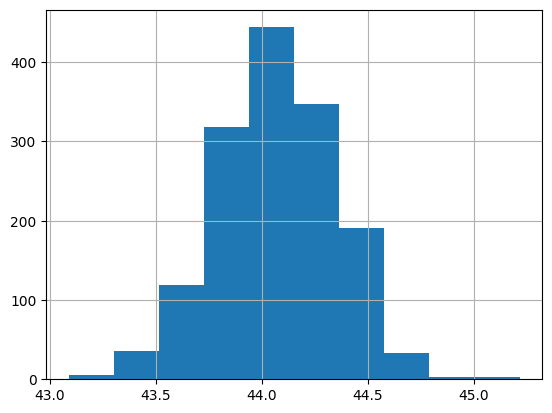

In [91]:
# histograma

muestras.mean().hist()

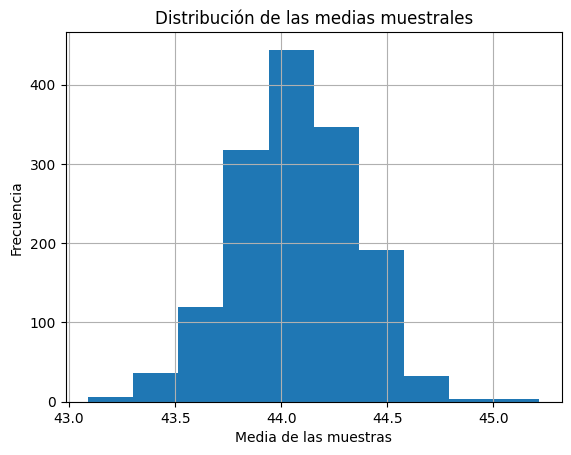

In [92]:
muestras.mean().hist()
plt.xlabel('Media de las muestras')
plt.ylabel('Frecuencia')
plt.title('Distribución de las medias muestrales')
plt.grid(True)
plt.show()

> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

In [93]:
# media de la poblacion datos

datos.Edad.mean()

np.float64(44.07142113482561)

In [95]:
# media del dataframe muestras es parecida

muestras.mean().mean()

np.float64(44.06886700000001)

> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

In [97]:
# desviaciones estandar

muestras.mean().std()

0.28122140292417575

In [98]:
# desviacion estandar original

datos.Edad.std()

12.480583465360187

In [100]:
# es muy parecida ala desviacion estandar de las muestras

datos.Edad.std() / np.sqrt(n)

np.float64(0.2790743302740527)

## <font color=green>4.2 Los niveles de confianza y significación</font>
***

El **nivel de confianza** ($1 - \alpha$) representa la probabilidad de que la estimación sea correcta. Además, el **nivel de significancia** ($\alpha$) expresa la probabilidad de error de la estimación.

El **nivel de confianza** representa el grado de confiabilidad del resultado estimado dentro de un cierto rango. Cuando establecemos un **nivel de confianza del 95%** en una encuesta, por ejemplo, estamos asumiendo que existe una probabilidad del 95% de que los resultados de la encuesta representen bien la realidad, es decir, sean correctos.

El **nivel de confianza** de una estimación se puede obtener del área bajo la curva normal como se muestra en la figura siguiente.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img007.png' width='450px'>


## <font color=green>4.3 Error inferencial</font>
***

El **error inferencial** se define por la **desviación estándar de las medias muestrales** $\sigma_\bar{x}$ y por el **nivel de confianza** determinado para el proceso.

# $$e = z \frac{\sigma}{\sqrt{n}}$$

## <font color=green>4.4 Intervalos de confianza</font>
***

### Intervalo de confianza para la media poblacional

#### Con desviación estándar poblacional conocida

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### Con desviación estándar de población desconocida

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

## <font color='blue'>Ejemplo: </font>

Suponga que los pesos de las bolsas de arroz de una industria alimentaria se distribuyen aproximadamente como una población normal con **desviación estándar igual a 150 g**. Se seleccionó una **muestra aleatoria de 20 bolsas** de un lote específico, se obtuvo un **peso promedio de 5.050 g**. Construya un intervalo de confianza para el **promedio de la población** asumiendo un **nivel de significancia del 5%**.

### Media muestral

### Nivel de significancia ($\alpha$)

### Nivel de confianza ($1 - \alpha$)

### Obteniendo $z$

### Obteniendo $z$

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img008.png' width='450px'>

### Valores de $z$ para los niveles de confianza más utilizados

|Nivel de<br>confianza|Valor del área bajo<br>la curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0.95                               |1.645|
|95%               |0.975                              |1.96 |
|99%               |0.995                              |2.575|

### Obteniendo $\sigma_\bar{x}$

### Obteniendo $e$

### Solución 1 - Calculando el intervalo de confianza para la media

### Solución 2 - Calculando el intervalo de confianza para la media

# <font color=green>5 CÁLCULO DEL TAMAÑO DE LA MUESTRA</font>
***

## <font color='red'>Problema </font>

Estamos estudiando los ingresos mensuales de los jefes de hogar con ingresos de hasta R$\$$ 5.000,00 en Brasil. Nuestro supervisor determinó que el **error máximo en relación a la media es de R$\$$ 10,00**. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **R$\$$ 1.082,79**. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio?

## <font color=green>5.1 Variables cuantitativas y población infinita</font>
***

# $$e = z \frac{\sigma}{\sqrt{n}}$$

#### Con desviación estándar conocida

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

#### Con desviación estándar desconocida

## $$n = \left(z\frac{s}{e}\right)^2$$

Donde:

$z$ = variable normal estandarizada

$\sigma$ = desviación estándar poblacional

$s$ = desviación estándar de la muestra

$e$ = error inferencial

### <font color='red'>Comentarios</font>

1. La desviación estándar ($\sigma$ o $s$) y el error ($e$) deben estar en la misma unidad de medida.

2. Cuando el error ($e$) se representa en términos porcentuales, debe interpretarse como un porcentaje relacionado con el promedio.

## <font color='blue'>Ejemplo: Rendimiento medio</font>

Estamos estudiando los ingresos mensuales de los jefes de hogar. Nuestro supervisor determinó que el **error máximo en relación a la media es de $\$$ 100,00** pesos. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **$\$$ 3.323,39** pesos. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio?

### Obteniendo $\sigma$

### Obteniendo $e$

### Obteniendo $n$

---
---

## <font color='red'>Problema</font>

En un lote de **10 000 latas** de gaseosa, se realizó una muestra aleatoria simple de **100 latas** y se obtuvo que la **desviación estándar muestral del contenido de las latas es igual a 12 ml**. El fabricante estipula un **error máximo en la media poblacional de solo 5 ml**. Para garantizar un **nivel de confianza del 95%**, ¿qué tamaño de muestra se debe seleccionar para este estudio?

## <font color=green>5.2 Variables cuantitativas y población finita</font>
***

#### Con desviación estándar conocida

## $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

#### Con desviación estándar desconocida

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Donde:

$N$ = tamaño de la población

$z$ = variable normal estandarizada

$\sigma$ = desviación estándar poblacional

$s$ = desviación estándar muestral

$e$ = error inferencial

## <font color='blue'>Ejemplo: Industria de refrescos</font>

En un lote de **10 000 latas** de gaseosa, se realizó una muestra aleatoria simple de **100 latas** y se obtuvo que la **desviación estándar muestral del contenido de las latas es igual a 12 ml**. El fabricante estipula un **error máximo en la media poblacional de solo 5 ml**. Para garantizar un **nivel de confianza del 95%**, ¿qué tamaño de muestra se debe seleccionar para este estudio?

### Obteniendo $N$

### Obteniendo $z$

### Obteniendo $s$

### Obteniendo $e$

### Obteniendo $n$

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

# <font color=green>6 FIJANDO EL CONTENIDO</font>
***

## <font color='blue'>Ejemplo: Rendimiento medio</font>

Estamos estudiando **los ingresos mensuales de los jefes de hogar con ingresos de hasta R$\$$ 5.000,00 en Brasil**. Nuestro supervisor determinó que el **error máximo en relación a la media es de R$\$$ 10,00**. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **R$\$$ 1.082,79** y que la **media poblacional** es **R$\$$ 1.426,54**. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio? ¿Cuál es el intervalo de confianza para la media considerando el tamaño de muestra obtenido?

### Construyendo el conjunto de datos según lo especificado por el problema

### Calcular el tamaño de la muestra

### Calcular el intervalo de confianza para la media

### Realización de una prueba gráfica